<a href="https://colab.research.google.com/github/NataSamo/Python-ML/blob/main/keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
def create_model(layers_sizes):
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for size in layers_sizes:
    model.add(layers.Dense(size, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
def train_and_evaluate(model, epochs=10, patience=3):
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
  history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])
  _, accuracy = model.evaluate(x_test, y_test, verbose=0)
  return accuracy, history

In [ ]:
models = [
  ('2 слоя (128, 10)', create_model([128, 10])),
  ('3 слоя (64, 32, 10)', create_model([64, 32, 10])),
  ('4 слоя (32, 16, 8, 10)', create_model([32, 16, 8, 10])),
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
results = []
for name, model in models:
  accuracy, history = train_and_evaluate(model)
  results.append((name, accuracy, history))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8391 - loss: 0.5427 - val_accuracy: 0.9614 - val_loss: 0.1323
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1289 - val_accuracy: 0.9661 - val_loss: 0.1086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9730 - loss: 0.0861 - val_accuracy: 0.9710 - val_loss: 0.0919
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9808 - loss: 0.0631 - val_accuracy: 0.9699 - val_loss: 0.0980
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9848 - loss: 0.0481 - val_accuracy: 0.9746 - val_loss: 0.0871
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0402 - val_accuracy: 0.9753 - val_loss: 0.0858
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9761 - val_loss: 0.0810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0269 -

Модель: 2 слоя (128, 10), Точность: 0.9765


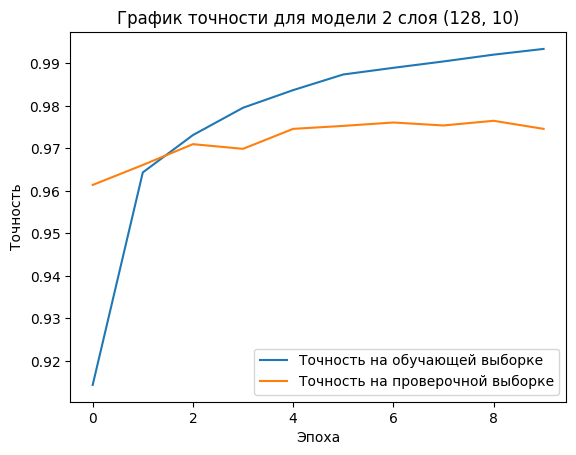

Модель: 3 слоя (64, 32, 10), Точность: 0.9730


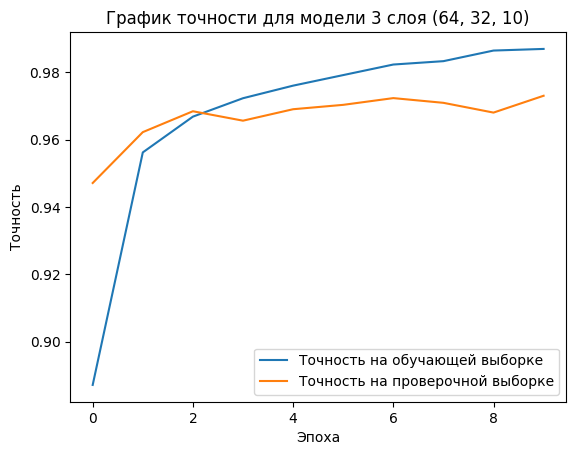

Модель: 4 слоя (32, 16, 8, 10), Точность: 0.9609


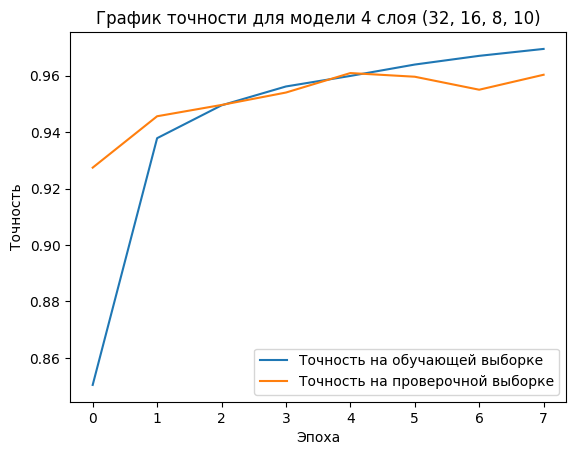

In [ ]:
for name, accuracy, history in results:
  print(f'Модель: {name}, Точность: {accuracy:.4f}')
  plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
  plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.title(f'График точности для модели {name}')
  plt.legend()
  plt.show()

In [ ]:
def create_model_5(layers_sizes):
  model5 = keras.Sequential()
  model5.add(layers.Flatten(input_shape=(28, 28)))
  for size in layers_sizes:
    model5.add(layers.Dense(size, activation='relu'))
  model5.add(layers.Dense(10, activation='softmax'))
  model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model5

In [ ]:
def train_and_evaluate_5(model5, epochs=5, patience=3):
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
  history = model5.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping])
  _, accuracy = model5.evaluate(x_test, y_test, verbose=0)
  return accuracy, history

In [ ]:
models = [
  ('2 слоя (128, 10)', create_model_5([128, 10])),
  ('3 слоя (64, 32, 10)', create_model_5([64, 32, 10])),
  ('4 слоя (32, 16, 8, 10)', create_model_5([32, 16, 8, 10])),
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
results = []
for name, model in models:
  accuracy, history = train_and_evaluate_5(model)
  results.append((name, accuracy, history))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8228 - loss: 0.5855 - val_accuracy: 0.9571 - val_loss: 0.1392
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9634 - loss: 0.1251 - val_accuracy: 0.9660 - val_loss: 0.1095
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0876 - val_accuracy: 0.9741 - val_loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9813 - loss: 0.0621 - val_accuracy: 0.9723 - val_loss: 0.0883
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9847 - loss: 0.0478 - val_accuracy: 0.9764 - val_loss: 0.0770
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8038 - loss: 0.6143 - val_accuracy: 0.9507 - val_loss: 0.1665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9571 - loss: 0.1488 - val_accuracy: 0.9656 - val_loss: 0.1142
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9685 - loss: 0.1062 - val_accu

Модель: 2 слоя (128, 10), Точность: 0.9764


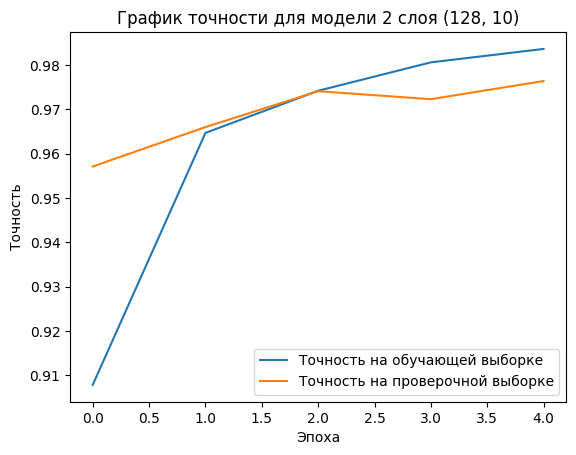

Модель: 3 слоя (64, 32, 10), Точность: 0.9704


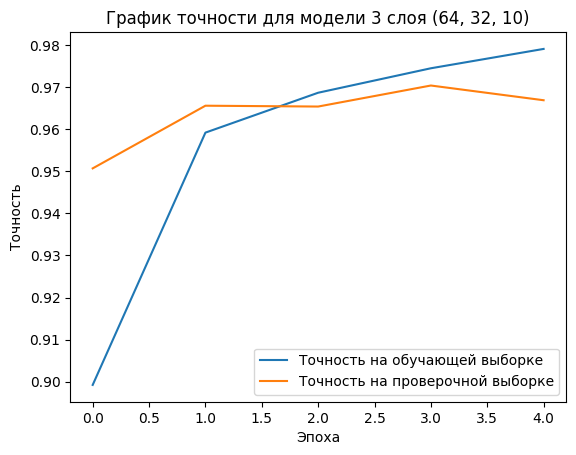

Модель: 4 слоя (32, 16, 8, 10), Точность: 0.9620


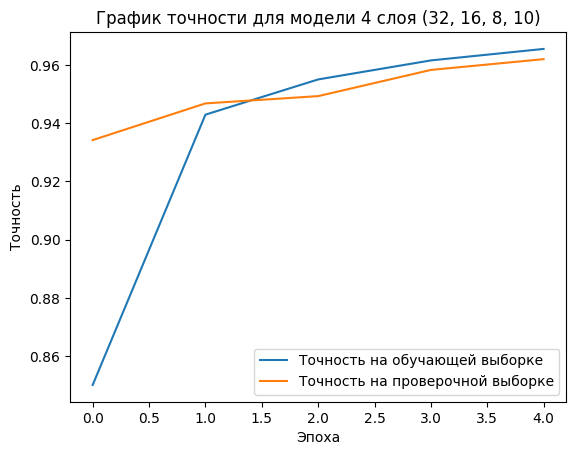

In [ ]:
for name, accuracy, history in results:
  print(f'Модель: {name}, Точность: {accuracy:.4f}')
  plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
  plt.plot(history.history['val_accuracy'], label='Точность на проверочной выборке')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.title(f'График точности для модели {name}')
  plt.legend()
  plt.show()

In [ ]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5648 - loss: 1.6753 - val_accuracy: 0.8554 - val_loss: 0.5882
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8641 - loss: 0.5361 - val_accuracy: 0.8940 - val_loss: 0.4022
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8911 - loss: 0.3950 - val_accuracy: 0.9052 - val_loss: 0.3440
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9042 - loss: 0.3447 - val_accuracy: 0.9111 - val_loss: 0.3148
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9081 - loss: 0.3181 - val_accuracy: 0.9129 - val_loss: 0.3024


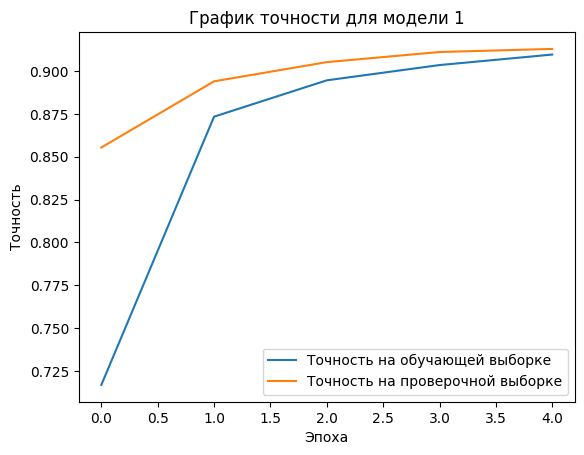

In [ ]:
plt.plot(history1.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history1.history['val_accuracy'], label='Точность на проверочной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title(f'График точности для модели 1')
plt.legend()
plt.show()

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8284 - loss: 7.7002 - val_accuracy: 0.8818 - val_loss: 0.5292
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.4160 - val_accuracy: 0.9092 - val_loss: 0.4066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.3020 - val_accuracy: 0.9292 - val_loss: 0.2913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9334 - loss: 0.2504 - val_accuracy: 0.9241 - val_loss: 0.3311
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9414 - loss: 0.2272 - val_accuracy: 0.9439 - val_loss: 0.2418


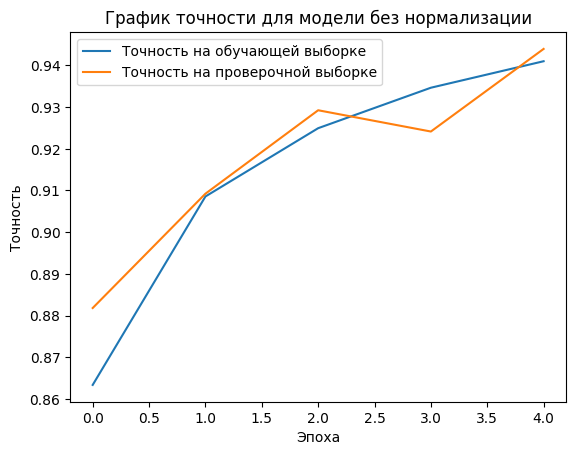

In [ ]:
plt.plot(history1.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history1.history['val_accuracy'], label='Точность на проверочной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title(f'График точности для модели без нормализации')
plt.legend()
plt.show()

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5578 - loss: 4.2512 - val_accuracy: 0.8429 - val_loss: 0.6164
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8649 - loss: 0.5358 - val_accuracy: 0.9153 - val_loss: 0.3492
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9198 - loss: 0.3308 - val_accuracy: 0.9355 - val_loss: 0.2786
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9405 - loss: 0.2394 - val_accuracy: 0.9506 - val_loss: 0.2140
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9506 - loss: 0.1953 - val_accuracy: 0.9516 - val_loss: 0.1993


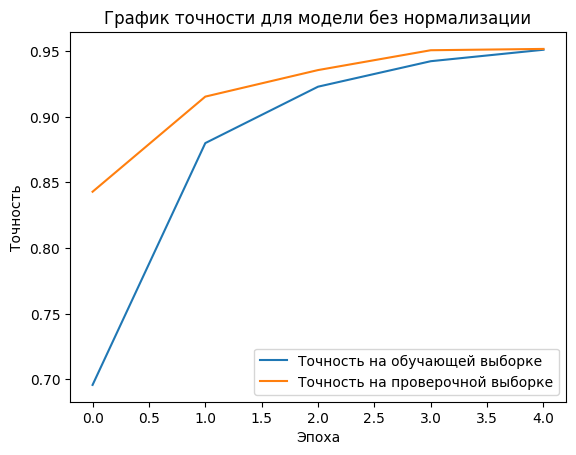

In [ ]:
plt.plot(history2.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history2.history['val_accuracy'], label='Точность на проверочной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title(f'График точности для модели без нормализации')
plt.legend()
plt.show()

In [ ]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5967 - loss: 5.5397 - val_accuracy: 0.8384 - val_loss: 0.6484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.5690 - val_accuracy: 0.8822 - val_loss: 0.4846
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9008 - loss: 0.4014 - val_accuracy: 0.9018 - val_loss: 0.3700
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9169 - loss: 0.3264 - val_accuracy: 0.9209 - val_loss: 0.3349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9254 - loss: 0.2957 - val_accuracy: 0.9235 - val_loss: 0.3038


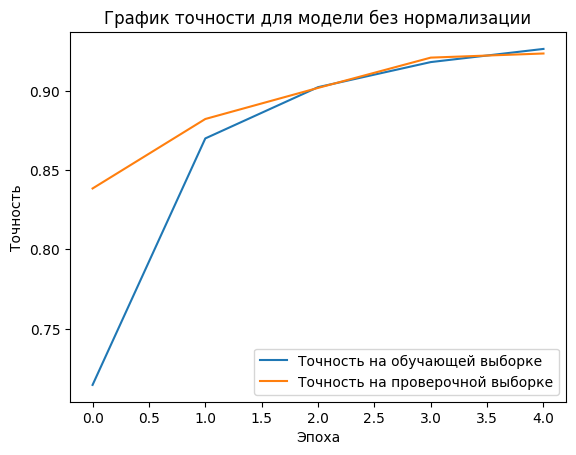

In [ ]:
plt.plot(history3.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history3.history['val_accuracy'], label='Точность на проверочной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title(f'График точности для модели без нормализации')
plt.legend()
plt.show()